In [1]:
from __future__ import print_function
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'
import numpy as np
import tensorflow as tf
    
import sys
sys.path.append('/deep/')
import arff
import pandas as pd
import scipy
import pdb
from tensorflow import keras
    
from keras.layers import Input,Dense, Activation,Dropout,Flatten,Reshape,Lambda
from keras.layers import Conv1D,MaxPooling1D,UpSampling1D,MaxPool1D,AveragePooling1D
from keras.layers import concatenate,merge
from keras.models import Model,load_model,Sequential
from keras.layers.normalization import BatchNormalization
import pydot
from keras import optimizers,initializers,regularizers
from keras import backend as K
#K.set_image_data_format('channels_last')
from keras.callbacks import TensorBoard,ModelCheckpoint,EarlyStopping
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
import time
    
config = tf.compat.v1.ConfigProto()    
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config = config)

from tensorflow.python.keras import backend as tf_bkend
tf_bkend.set_session(sess)

#import matplotlib
#matplotlib.use('agg')
#%matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
#plt.switch_backend('agg')
import appendDataExam
from sklearn import preprocessing
import Audio_Models
import utils_1
import utils_2
import utils_3
        
from scipy.io import savemat
from sklearn.metrics import mean_squared_error
from math import ceil
import gc
from  expandDimAudio1Dim import ExpandDimAudio
import Read_And_Load_Data_From_Wav_Audio
import sklearn
from sklearn.model_selection import train_test_split
    
from sklearn.metrics import accuracy_score, make_scorer, fbeta_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import Estimation_Score
import Audio_Models_PreTraining
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import librosa
from librosa import display
import glob 
import joblib

In [2]:
path_='/dataset/'
path_ravdess=path_+'RAVDESS_16KHZ/'

path_tess=path_+'TESS_16KHZ/'

save_dir = path_ + 'saved_model/'

emotions = {'neutral': 0, 'calm': 1, 'happy': 2, 'sad': 3, 'angry': 4,
             'fear': 5, 'disgust': 6, 'surprised': 7}

#  Exploratory Data Analysis (EDA)

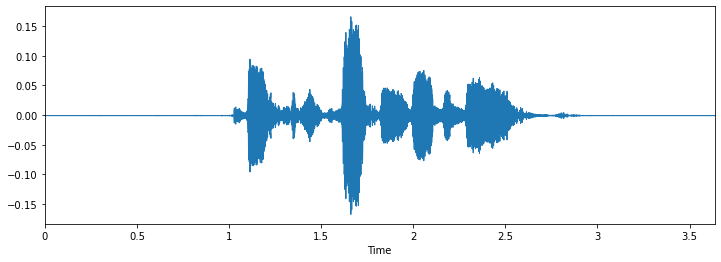

In [3]:
#RAVDESS
%matplotlib inline
path_eda=path_ravdess+'Audio_Speech_Actors_01-24/Actor_01/03-01-03-02-01-02-01_happy.wav'
data_eda,sampling_rate_eda = librosa.load(path_eda)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data_eda, sr=sampling_rate_eda)

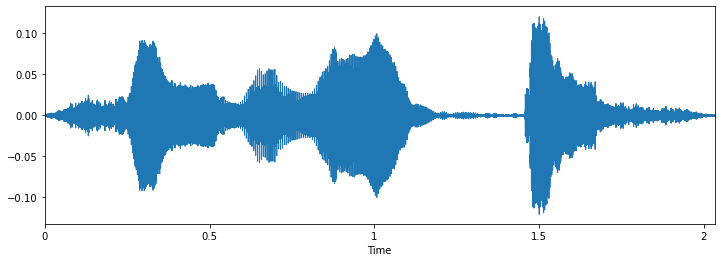

In [4]:
#TESS
%matplotlib inline
path_eda=path_tess+'/dataverse_files/OAF_base_happy.wav'
data_eda,sampling_rate_eda = librosa.load(path_eda)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data_eda, sr=sampling_rate_eda)

# Load Data

In [5]:
data=[]
start_time = time.time()

for subdir, dirs, files in os.walk(path_ravdess):
    #print("subdir:\n", subdir)
    #print("files:\n", files)
    #print("dirs:\n", dirs)
    for file in files:
        if file.endswith(".wav"):
            print("file:\n", file)
            try:
                #Load wave file read  with librosa array, obtain mfcc, store the file and the mcc information in a new array
                X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
                mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
                # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
                # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
                label = int(file[7:8]) - 1 
                print("label is:",label)
                data_labels = mfccs,label
                #print("data_labels is:",data_labels)
                data.append(data_labels)
                
            except ValueError:
                continue

print("data len is:\n", len(data))
print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

file:
 03-01-08-01-01-02-23_surprised.wav
label is: 7
file:
 03-01-06-02-02-02-23_fear.wav
label is: 5
file:
 03-01-03-02-01-01-23_happy.wav
label is: 2
file:
 03-01-05-02-01-01-23_angry.wav
label is: 4
file:
 03-01-07-01-02-01-23_disgust.wav
label is: 6
file:
 03-01-07-01-02-02-23_disgust.wav
label is: 6
file:
 03-01-02-02-02-02-23_calm.wav
label is: 1
file:
 03-01-03-01-01-02-23_happy.wav
label is: 2
file:
 03-01-04-01-02-01-23_sad.wav
label is: 3
file:
 03-01-08-02-02-01-23_surprised.wav
label is: 7
file:
 03-01-01-01-02-01-23_neutral.wav
label is: 0
file:
 03-01-05-01-01-01-23_angry.wav
label is: 4
file:
 03-01-06-01-02-02-23_fear.wav
label is: 5
file:
 03-01-02-02-02-01-23_calm.wav
label is: 1
file:
 03-01-01-01-01-01-23_neutral.wav
label is: 0
file:
 03-01-05-02-01-02-23_angry.wav
label is: 4
file:
 03-01-01-01-02-02-23_neutral.wav
label is: 0
file:
 03-01-06-01-01-02-23_fear.wav
label is: 5
file:
 03-01-04-01-02-02-23_sad.wav
label is: 3
file:
 03-01-06-02-01-01-23_fear.wav
labe

label is: 3
file:
 03-01-04-01-01-02-11_sad.wav
label is: 3
file:
 03-01-04-02-01-01-11_sad.wav
label is: 3
file:
 03-01-05-01-02-02-11_angry.wav
label is: 4
file:
 03-01-08-02-02-01-11_surprised.wav
label is: 7
file:
 03-01-03-02-01-01-11_happy.wav
label is: 2
file:
 03-01-06-01-02-01-11_fear.wav
label is: 5
file:
 03-01-05-02-02-02-11_angry.wav
label is: 4
file:
 03-01-07-02-02-02-11_disgust.wav
label is: 6
file:
 03-01-02-01-02-01-11_calm.wav
label is: 1
file:
 03-01-02-01-01-01-11_calm.wav
label is: 1
file:
 03-01-05-02-01-01-11_angry.wav
label is: 4
file:
 03-01-05-01-01-02-11_angry.wav
label is: 4
file:
 03-01-07-02-01-01-11_disgust.wav
label is: 6
file:
 03-01-03-01-02-02-22_happy.wav
label is: 2
file:
 03-01-07-02-02-01-22_disgust.wav
label is: 6
file:
 03-01-04-02-02-01-22_sad.wav
label is: 3
file:
 03-01-02-02-02-02-22_calm.wav
label is: 1
file:
 03-01-01-01-02-01-22_neutral.wav
label is: 0
file:
 03-01-08-01-02-01-22_surprised.wav
label is: 7
file:
 03-01-06-01-02-02-22_fear

label is: 7
file:
 03-01-01-01-01-01-13_neutral.wav
label is: 0
file:
 03-01-07-01-02-02-13_disgust.wav
label is: 6
file:
 03-01-03-01-01-02-13_happy.wav
label is: 2
file:
 03-01-07-01-01-01-13_disgust.wav
label is: 6
file:
 03-01-02-01-02-01-13_calm.wav
label is: 1
file:
 03-01-08-02-01-02-13_surprised.wav
label is: 7
file:
 03-01-07-02-02-01-13_disgust.wav
label is: 6
file:
 03-01-07-01-01-02-13_disgust.wav
label is: 6
file:
 03-01-03-01-02-02-13_happy.wav
label is: 2
file:
 03-01-02-01-01-01-13_calm.wav
label is: 1
file:
 03-01-02-02-01-02-13_calm.wav
label is: 1
file:
 03-01-08-01-01-02-13_surprised.wav
label is: 7
file:
 03-01-06-02-01-01-13_fear.wav
label is: 5
file:
 03-01-04-01-01-02-13_sad.wav
label is: 3
file:
 03-01-05-01-02-01-13_angry.wav
label is: 4
file:
 03-01-05-02-01-02-13_angry.wav
label is: 4
file:
 03-01-03-01-01-01-13_happy.wav
label is: 2
file:
 03-01-01-01-01-02-13_neutral.wav
label is: 0
file:
 03-01-05-02-01-01-13_angry.wav
label is: 4
file:
 03-01-08-02-02-02

label is: 4
file:
 03-01-06-01-01-02-08_fear.wav
label is: 5
file:
 03-01-04-01-02-01-08_sad.wav
label is: 3
file:
 03-01-07-02-02-01-08_disgust.wav
label is: 6
file:
 03-01-06-02-01-01-08_fear.wav
label is: 5
file:
 03-01-07-02-02-02-08_disgust.wav
label is: 6
file:
 03-01-03-02-01-02-08_happy.wav
label is: 2
file:
 03-01-03-02-02-01-08_happy.wav
label is: 2
file:
 03-01-02-02-01-02-08_calm.wav
label is: 1
file:
 03-01-07-01-02-02-08_disgust.wav
label is: 6
file:
 03-01-05-01-01-02-08_angry.wav
label is: 4
file:
 03-01-08-01-01-01-08_surprised.wav
label is: 7
file:
 03-01-06-01-01-01-08_fear.wav
label is: 5
file:
 03-01-02-01-01-02-08_calm.wav
label is: 1
file:
 03-01-02-02-02-02-08_calm.wav
label is: 1
file:
 03-01-01-01-01-02-08_neutral.wav
label is: 0
file:
 03-01-08-02-01-02-08_surprised.wav
label is: 7
file:
 03-01-04-02-01-02-08_sad.wav
label is: 3
file:
 03-01-05-01-02-02-08_angry.wav
label is: 4
file:
 03-01-07-01-01-02-08_disgust.wav
label is: 6
file:
 03-01-04-02-01-01-08_sa

label is: 5
file:
 03-01-03-02-02-01-09_happy.wav
label is: 2
file:
 03-01-04-01-01-01-09_sad.wav
label is: 3
file:
 03-01-06-01-01-01-09_fear.wav
label is: 5
file:
 03-01-01-01-02-01-09_neutral.wav
label is: 0
file:
 03-01-07-02-01-02-09_disgust.wav
label is: 6
file:
 03-01-04-02-02-02-09_sad.wav
label is: 3
file:
 03-01-06-02-01-02-09_fear.wav
label is: 5
file:
 03-01-08-01-01-02-09_surprised.wav
label is: 7
file:
 03-01-05-01-01-01-09_angry.wav
label is: 4
file:
 03-01-06-02-02-02-09_fear.wav
label is: 5
file:
 03-01-08-02-01-02-09_surprised.wav
label is: 7
file:
 03-01-03-02-01-02-09_happy.wav
label is: 2
file:
 03-01-02-02-01-01-09_calm.wav
label is: 1
file:
 03-01-07-01-01-01-09_disgust.wav
label is: 6
file:
 03-01-05-02-01-02-09_angry.wav
label is: 4
file:
 03-01-06-02-02-01-09_fear.wav
label is: 5
file:
 03-01-05-01-02-01-09_angry.wav
label is: 4
file:
 03-01-06-01-01-02-09_fear.wav
label is: 5
file:
 03-01-04-02-01-02-09_sad.wav
label is: 3
file:
 03-01-07-02-02-02-09_disgust.

label is: 4
file:
 03-01-02-01-01-01-05_calm.wav
label is: 1
file:
 03-01-03-02-01-01-05_happy.wav
label is: 2
file:
 03-01-08-01-01-02-05_surprised.wav
label is: 7
file:
 03-01-07-02-01-01-05_disgust.wav
label is: 6
file:
 03-01-07-01-02-01-05_disgust.wav
label is: 6
file:
 03-01-06-01-02-01-05_fear.wav
label is: 5
file:
 03-01-07-02-01-02-05_disgust.wav
label is: 6
file:
 03-01-07-02-02-02-05_disgust.wav
label is: 6
file:
 03-01-03-02-02-02-05_happy.wav
label is: 2
file:
 03-01-08-01-02-01-05_surprised.wav
label is: 7
file:
 03-01-05-01-01-02-05_angry.wav
label is: 4
file:
 03-01-04-02-02-02-05_sad.wav
label is: 3
file:
 03-01-04-02-02-02-12_sad.wav
label is: 3
file:
 03-01-04-01-02-01-12_sad.wav
label is: 3
file:
 03-01-08-01-02-02-12_surprised.wav
label is: 7
file:
 03-01-07-01-01-02-12_disgust.wav
label is: 6
file:
 03-01-04-02-01-02-12_sad.wav
label is: 3
file:
 03-01-03-01-01-02-12_happy.wav
label is: 2
file:
 03-01-07-02-01-02-12_disgust.wav
label is: 6
file:
 03-01-04-01-02-02

label is: 5
file:
 03-01-01-01-01-02-02_neutral.wav
label is: 0
file:
 03-01-03-02-01-02-02_happy.wav
label is: 2
file:
 03-01-06-02-01-01-02_fear.wav
label is: 5
file:
 03-01-02-01-02-02-02_calm.wav
label is: 1
file:
 03-01-05-02-01-01-02_angry.wav
label is: 4
file:
 03-01-01-01-02-02-02_neutral.wav
label is: 0
file:
 03-01-07-02-01-01-02_disgust.wav
label is: 6
file:
 03-01-05-02-01-02-02_angry.wav
label is: 4
file:
 03-01-02-02-01-01-02_calm.wav
label is: 1
file:
 03-01-06-02-02-01-02_fear.wav
label is: 5
file:
 03-01-06-01-02-01-02_fear.wav
label is: 5
file:
 03-01-02-02-02-02-02_calm.wav
label is: 1
file:
 03-01-02-01-01-01-02_calm.wav
label is: 1
file:
 03-01-07-01-02-02-02_disgust.wav
label is: 6
file:
 03-01-07-02-02-02-02_disgust.wav
label is: 6
file:
 03-01-02-01-02-01-02_calm.wav
label is: 1
file:
 03-01-08-02-01-01-02_surprised.wav
label is: 7
file:
 03-01-05-02-02-01-02_angry.wav
label is: 4
file:
 03-01-08-02-02-02-02_surprised.wav
label is: 7
file:
 03-01-04-01-02-02-02_

label is: 7
file:
 03-01-03-01-01-02-20_happy.wav
label is: 2
file:
 03-01-07-02-01-02-20_disgust.wav
label is: 6
file:
 03-01-03-02-02-02-20_happy.wav
label is: 2
file:
 03-01-07-01-02-02-20_disgust.wav
label is: 6
file:
 03-01-07-01-02-01-20_disgust.wav
label is: 6
file:
 03-01-05-02-02-01-20_angry.wav
label is: 4
file:
 03-01-05-01-01-01-20_angry.wav
label is: 4
file:
 03-01-02-01-01-01-20_calm.wav
label is: 1
file:
 03-01-06-01-01-02-20_fear.wav
label is: 5
file:
 03-01-08-02-01-02-20_surprised.wav
label is: 7
file:
 03-01-06-02-01-01-20_fear.wav
label is: 5
file:
 03-01-05-01-02-01-20_angry.wav
label is: 4
file:
 03-01-06-02-01-02-20_fear.wav
label is: 5
file:
 03-01-08-01-01-02-20_surprised.wav
label is: 7
file:
 03-01-08-01-02-01-20_surprised.wav
label is: 7
file:
 03-01-07-02-02-01-20_disgust.wav
label is: 6
file:
 03-01-04-01-01-02-20_sad.wav
label is: 3
file:
 03-01-02-01-02-01-20_calm.wav
label is: 1
file:
 03-01-08-02-02-01-20_surprised.wav
label is: 7
file:
 03-01-06-01-02

label is: 4
file:
 03-01-02-02-02-02-10_calm.wav
label is: 1
file:
 03-01-06-01-02-01-10_fear.wav
label is: 5
file:
 03-01-08-01-02-01-10_surprised.wav
label is: 7
file:
 03-01-05-02-02-02-10_angry.wav
label is: 4
file:
 03-01-01-01-02-02-10_neutral.wav
label is: 0
file:
 03-01-05-02-02-01-10_angry.wav
label is: 4
file:
 03-01-07-01-01-02-10_disgust.wav
label is: 6
file:
 03-01-02-02-01-02-10_calm.wav
label is: 1
file:
 03-01-04-01-02-01-10_sad.wav
label is: 3
file:
 03-01-04-01-02-02-10_sad.wav
label is: 3
file:
 03-01-07-02-01-01-10_disgust.wav
label is: 6
file:
 03-01-06-02-02-01-10_fear.wav
label is: 5
file:
 03-01-03-02-02-01-10_happy.wav
label is: 2
file:
 03-01-03-02-01-02-10_happy.wav
label is: 2
file:
 03-01-06-01-01-02-10_fear.wav
label is: 5
file:
 03-01-07-02-01-02-10_disgust.wav
label is: 6
file:
 03-01-03-01-01-02-10_happy.wav
label is: 2
file:
 03-01-06-02-01-01-10_fear.wav
label is: 5
file:
 03-01-06-02-02-02-10_fear.wav
label is: 5
file:
 03-01-08-01-02-02-10_surprised

In [6]:
for subdir, dirs, files in os.walk(path_tess):
    #print("subdir:\n", subdir)
    #print("files:\n", files)
    #print("dirs:\n", dirs)
    for file in files:
        if file.endswith(".wav"):
            print("file:\n", file)
            try:
                #Load wave file read  with librosa array, obtain mfcc, store the file and the mcc information in a new array
                X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
                mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
                # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
                # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
                file_= file.split('_')
                if len(file_)>2:
                     emotion_ = file_[2].split('.')[0]
                elif len(file_)==2:
                      emotion_ = file.split('_')[1].split('.')[0]
                print('emotion is:\n', emotion_)
                label = emotions[emotion_]
                print("label is:",label)
                data_labels = mfccs,label
                #print("data_labels is:",data_labels)
                data.append(data_labels)
                
            except ValueError:
                continue

print("data len is:\n", len(data))
print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

file:
 YAF_gin_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_date_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_thumb_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_choice_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_wife_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_kick_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_week_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_fat_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_page_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_deep_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_such_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_king_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_search_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_rose_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_third_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_tell_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_luck_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_shawl_

emotion is:
 disgust
label is: 6
file:
 YAF_laud_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_judge_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_void_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_germ_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_lease_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_raid_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_get_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_thumb_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_witch_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_hall_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_limb_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_jail_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_hole_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_juice_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_chair_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_mess_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_tough_disgust.w

emotion is:
 surprised
label is: 7
file:
 YAF_merge_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_team_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_dab_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_jar_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_white_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_thin_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_bite_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_note_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_limb_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_mop_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_yes_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_hall_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_pad_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_thought_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_sub_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_cheek_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_page_surprised

emotion is:
 fear
label is: 5
file:
 OAF_rat_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_ripe_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_such_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_dead_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_merge_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_keep_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_pool_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_team_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_came_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_late_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_team_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_dodge_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_bone_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_shawl_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_ditch_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_fall_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_late_fear.wav
emotion is:
 f

emotion is:
 surprised
label is: 7
file:
 YAF_sheep_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_fit_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_cheek_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_learn_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_met_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_dip_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_hush_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_fall_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_match_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_back_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_sheep_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_sure_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_bone_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_voice_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_read_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_death_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_bought_surprised

emotion is:
 neutral
label is: 0
file:
 OAF_ditch_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_perch_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_bar_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_rose_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_kite_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_make_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_sheep_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_reach_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_shirt_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_dab_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_half_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_kite_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_team_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_keen_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_fit_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_yes_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_good_neutral.wav
emotion is:
 n

emotion is:
 happy
label is: 2
file:
 YAF_soap_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_lid_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_soap_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_neat_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_search_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_mood_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_dead_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_talk_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_pad_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_raid_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_lose_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_doll_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_hole_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_hire_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_death_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_voice_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_knock_fear.wav
emotion

emotion is:
 surprised
label is: 7
file:
 OAF_keg_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_thin_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_fit_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_gas_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_pole_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_hate_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_turn_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_near_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_red_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_red_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_team_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_bar_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_have_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_knock_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_phone_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_luck_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_fit_neutral.wav
emotion is:
 neutral
l

emotion is:
 neutral
label is: 0
file:
 YAF_hall_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_back_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_met_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_bought_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_gun_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_sheep_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_yes_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_shirt_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_sub_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_hit_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_death_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_phone_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_note_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_dead_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_third_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_sour_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_

emotion is:
 neutral
label is: 0
file:
 YAF_nice_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_book_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_five_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_juice_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_rose_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_fit_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_bar_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_choice_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_laud_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_kite_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_ripe_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_talk_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_thought_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_sheep_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_room_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_fail_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_hit_surpr

emotion is:
 happy
label is: 2
file:
 OAF_said_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_bath_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_hate_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_young_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_sail_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_have_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_mop_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_bar_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_long_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_hire_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_take_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_jug_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_live_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_match_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_neat_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_hire_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_lid_surprised.wav
emotion is:
 surp

emotion is:
 happy
label is: 2
file:
 YAF_lid_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_mess_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_bone_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_size_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_road_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_lose_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_tell_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_pain_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_tire_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_south_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_gap_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_wire_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_check_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_jar_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_pain_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_came_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_raid_fear.wav
e

emotion is:
 angry
label is: 4
file:
 YAF_wife_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_yes_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_pearl_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_thought_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_loaf_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_cause_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_sell_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_pike_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_judge_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_dip_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_kick_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_chief_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_thumb_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_have_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_pick_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_wash_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_cheek_angry.wav
emot

emotion is:
 surprised
label is: 7
file:
 OAF_read_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_dab_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_which_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_dip_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_food_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_hate_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_kill_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_peg_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_chief_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_sure_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_when_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_love_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_boat_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_met_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_voice_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_name_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_bite_happy.

emotion is:
 neutral
label is: 0
file:
 OAF_sure_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_death_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_puff_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_whip_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_king_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_south_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_road_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_hole_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_fat_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_sheep_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_moon_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_fail_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_voice_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_gun_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_take_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_keen_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_deep_s

emotion is:
 disgust
label is: 6
file:
 OAF_dead_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_met_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_tire_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_soup_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_judge_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_bean_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_kite_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_loaf_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_chalk_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_boat_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_shawl_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_rain_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_mode_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_juice_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_thumb_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_said_neutral.wav
emotion is:
 neutral
label is: 0
file:

emotion is:
 surprised
label is: 7
file:
 YAF_match_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_book_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_talk_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_keg_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_goal_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_lean_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_puff_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_cause_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_check_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_voice_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_walk_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_numb_fear.wav
emotion is:
 fear
label is: 5
file:
 YAF_should_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_mood_neutral.wav
emotion is:
 neutral
label is: 0
file:
 YAF_hit_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_chief_surprised.wav
emotion is:
 surprised
label is: 7
file

emotion is:
 surprised
label is: 7
file:
 OAF_name_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_cause_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_rag_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_dog_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_road_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_bean_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_pass_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_chief_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_fat_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_bought_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_youth_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_pole_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_sure_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_base_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_knock_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_burn_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_juice_neutral.wav
emotion is:

emotion is:
 fear
label is: 5
file:
 OAF_check_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_doll_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_life_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_ripe_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_sail_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_calm_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_numb_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_goal_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_raid_happy.wav
emotion is:
 happy
label is: 2
file:
 YAF_soup_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_puff_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_mop_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_goose_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_sell_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_dip_happy.wav
emotion is:
 happy
label is: 2
file:
 OAF_bar_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_pole_sad.wav
emotion is:
 sa

emotion is:
 angry
label is: 4
file:
 YAF_kick_disgust.wav
emotion is:
 disgust
label is: 6
file:
 YAF_pass_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_far_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_wife_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_boat_neutral.wav
emotion is:
 neutral
label is: 0
file:
 OAF_rain_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_rush_sad.wav
emotion is:
 sad
label is: 3
file:
 YAF_get_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_keep_surprised.wav
emotion is:
 surprised
label is: 7
file:
 OAF_which_disgust.wav
emotion is:
 disgust
label is: 6
file:
 OAF_pass_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_shall_angry.wav
emotion is:
 angry
label is: 4
file:
 OAF_chat_angry.wav
emotion is:
 angry
label is: 4
file:
 YAF_hall_surprised.wav
emotion is:
 surprised
label is: 7
file:
 YAF_join_sad.wav
emotion is:
 sad
label is: 3
file:
 OAF_red_fear.wav
emotion is:
 fear
label is: 5
file:
 OAF_shall_sad.wav
emotion is:

In [7]:
labels=[]

for row in data:
    #print("row:\n", row)
    label= row[1]
    emotion=[k for k in emotions.keys() if emotions[k] == label] 
    labels.append(emotion)

#print("labels:\n", labels)
y_pd= pd.DataFrame(labels)

<AxesSubplot:ylabel='0'>

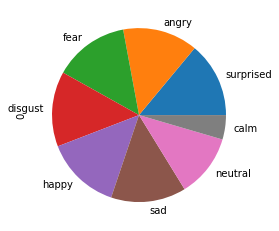

In [8]:
y_pd[0].value_counts().plot(kind='pie')

In [11]:
#Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
#X, y = zip(*lst)
# Saving joblib files to not load them again with the loop above
X, y = zip(*data)

X = np.asarray(X)
y = np.asarray(y)

X_sampl = 'X.joblib'
y_label = 'y.joblib'

savedX = joblib.dump(X, os.path.join(save_dir, X_sampl))
savedy = joblib.dump(y, os.path.join(save_dir, y_label))

In [12]:
# Loading saved data
X = joblib.load(save_dir+'X.joblib')
y = joblib.load(save_dir+'y.joblib')

print("X:\n",X)
print("y:\n",y)

X:
 [[-5.94914612e+02  6.48263397e+01 -2.50743313e+01 ...  1.47337019e+00
   2.00934052e-01  9.53090370e-01]
 [-5.40084045e+02  7.31504822e+01 -3.40247345e+01 ...  4.51880598e+00
   3.64901590e+00  3.78786325e+00]
 [-5.20430664e+02  4.65757179e+01 -2.71287422e+01 ... -3.20535809e-01
  -1.48881233e+00 -7.35415444e-02]
 ...
 [-3.52872070e+02  7.49084167e+01 -5.79172211e+01 ...  2.06304979e+00
   3.77064705e+00  4.53531313e+00]
 [-5.51462524e+02  1.03510826e+02  1.04418936e+01 ...  1.33033171e+01
   9.76790810e+00  1.01142406e+01]
 [-4.37774048e+02  1.15361404e+02 -4.14650574e+01 ...  2.12909031e+00
   1.25031400e+00  2.55557847e+00]]
y:
 [7 5 2 ... 5 3 6]


# Split Data into train set and test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Decision Tree Classifier

In [14]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
predictions = decision_tree.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       157
           1       0.39      0.46      0.43        65
           2       0.67      0.70      0.69       201
           3       0.78      0.66      0.72       221
           4       0.72      0.80      0.76       183
           5       0.70      0.73      0.72       194
           6       0.69      0.72      0.70       188
           7       0.68      0.60      0.64       191

    accuracy                           0.70      1400
   macro avg       0.68      0.69      0.68      1400
weighted avg       0.71      0.70      0.70      1400



# Random Forest

In [16]:
randforest = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)

In [17]:
randforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=100,
                       min_samples_leaf=3, min_samples_split=20,
                       n_estimators=22000, random_state=5)

In [18]:
predictions = randforest.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       157
           1       0.39      0.71      0.50        65
           2       0.90      0.73      0.81       201
           3       0.92      0.65      0.76       221
           4       0.87      0.81      0.84       183
           5       0.82      0.81      0.82       194
           6       0.55      0.86      0.67       188
           7       0.80      0.77      0.78       191

    accuracy                           0.77      1400
   macro avg       0.78      0.77      0.76      1400
weighted avg       0.82      0.77      0.78      1400



# Gradient Boosting

In [19]:
grd_boosting = GradientBoostingClassifier(n_estimators=22000, learning_rate=1e-5,
    max_depth=3, random_state=5)

grd_boosting.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1e-05, n_estimators=22000,
                           random_state=5)

In [20]:
predictions = grd_boosting.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       157
           1       0.87      0.20      0.33        65
           2       0.71      0.52      0.60       201
           3       0.91      0.57      0.70       221
           4       0.57      0.78      0.66       183
           5       0.89      0.69      0.78       194
           6       0.37      0.87      0.52       188
           7       0.74      0.54      0.63       191

    accuracy                           0.65      1400
   macro avg       0.76      0.62      0.64      1400
weighted avg       0.75      0.65      0.66      1400



# Deep Neural Network

In [21]:
lr = 0.00005
rho_= 0.9
epsi= None
decy = 0.0

In [22]:
x_train_exp = np.expand_dims(X_train, axis=2)
x_test_exp = np.expand_dims(X_test, axis=2)

In [23]:
def dnn_model(ds=8):
    
    model = Sequential()
    model.add(Conv1D(128,5,padding='same',activation='relu',input_shape=(40,1)))
    model.add(Dropout(0.2))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(128, 5, activation='relu',padding='same'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(ds))
    model.add(Activation('softmax'))
    
    return model

In [24]:
dnn = dnn_model(10)

dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 128)           768       
_________________________________________________________________
dropout (Dropout)            (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 128)            82048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                6

In [25]:
optimiz = optimizers.RMSprop(lr=lr, rho=rho_, epsilon=epsi, decay=decy)

/home/AN84020/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [26]:
dnn.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimiz,
              metrics=['accuracy'])

In [27]:
dnn_history=dnn.fit(x_train_exp, y_train, batch_size=16, epochs=1000, 
                          validation_data=(x_test_exp, y_test))

Epoch 1/1000
178/178 [==============================] - 11s 7ms/step - loss: 11.9017 - accuracy: 0.1265 - val_loss: 1.8193 - val_accuracy: 0.3836
Epoch 2/1000
178/178 [==============================] - 1s 4ms/step - loss: 6.0754 - accuracy: 0.2242 - val_loss: 1.2983 - val_accuracy: 0.5479
Epoch 3/1000
178/178 [==============================] - 1s 4ms/step - loss: 4.0463 - accuracy: 0.3018 - val_loss: 1.4244 - val_accuracy: 0.4936
Epoch 4/1000
178/178 [==============================] - 1s 4ms/step - loss: 2.8290 - accuracy: 0.3928 - val_loss: 1.2040 - val_accuracy: 0.6129
Epoch 5/1000
178/178 [==============================] - 1s 4ms/step - loss: 2.1524 - accuracy: 0.4326 - val_loss: 1.2191 - val_accuracy: 0.6014
Epoch 6/1000
178/178 [==============================] - 1s 4ms/step - loss: 1.6154 - accuracy: 0.4872 - val_loss: 1.2317 - val_accuracy: 0.6429
Epoch 7/1000
178/178 [==============================] - 1s 4ms/step - loss: 1.4822 - accuracy: 0.5346 - val_loss: 1.1868 - val_accurac

178/178 [==============================] - 1s 4ms/step - loss: 0.6330 - accuracy: 0.7699 - val_loss: 0.6833 - val_accuracy: 0.7500
Epoch 58/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.6540 - accuracy: 0.7592 - val_loss: 0.6730 - val_accuracy: 0.7607
Epoch 59/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.6404 - accuracy: 0.7707 - val_loss: 0.6690 - val_accuracy: 0.7564
Epoch 60/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.6569 - accuracy: 0.7578 - val_loss: 0.6737 - val_accuracy: 0.7629
Epoch 61/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.6163 - accuracy: 0.7865 - val_loss: 0.6638 - val_accuracy: 0.7614
Epoch 62/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.6462 - accuracy: 0.7597 - val_loss: 0.6746 - val_accuracy: 0.7543
Epoch 63/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.6065 - accuracy: 0.7754 - val_loss: 0.6683 - val_accuracy: 0.7607

178/178 [==============================] - 1s 4ms/step - loss: 0.5085 - accuracy: 0.8191 - val_loss: 0.6122 - val_accuracy: 0.7707
Epoch 114/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.5414 - accuracy: 0.8026 - val_loss: 0.6145 - val_accuracy: 0.7743
Epoch 115/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.4977 - accuracy: 0.8282 - val_loss: 0.6103 - val_accuracy: 0.7764
Epoch 116/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.5277 - accuracy: 0.8024 - val_loss: 0.6065 - val_accuracy: 0.7771
Epoch 117/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.5286 - accuracy: 0.8090 - val_loss: 0.6159 - val_accuracy: 0.7729
Epoch 118/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.5159 - accuracy: 0.8131 - val_loss: 0.6125 - val_accuracy: 0.7686
Epoch 119/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.5447 - accuracy: 0.7989 - val_loss: 0.6078 - val_accuracy: 

178/178 [==============================] - 1s 4ms/step - loss: 0.4977 - accuracy: 0.8072 - val_loss: 0.5826 - val_accuracy: 0.7779
Epoch 170/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.4827 - accuracy: 0.8241 - val_loss: 0.5953 - val_accuracy: 0.7793
Epoch 171/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.4589 - accuracy: 0.8456 - val_loss: 0.5765 - val_accuracy: 0.7800
Epoch 172/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.4743 - accuracy: 0.8243 - val_loss: 0.5733 - val_accuracy: 0.7793
Epoch 173/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.4585 - accuracy: 0.8332 - val_loss: 0.5849 - val_accuracy: 0.7857
Epoch 174/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.4749 - accuracy: 0.8333 - val_loss: 0.5815 - val_accuracy: 0.7857
Epoch 175/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.4817 - accuracy: 0.8221 - val_loss: 0.5811 - val_accuracy: 

178/178 [==============================] - 1s 4ms/step - loss: 0.4039 - accuracy: 0.8579 - val_loss: 0.5927 - val_accuracy: 0.7893
Epoch 226/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3998 - accuracy: 0.8594 - val_loss: 0.5625 - val_accuracy: 0.7929
Epoch 227/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.4245 - accuracy: 0.8424 - val_loss: 0.5676 - val_accuracy: 0.7943
Epoch 228/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.4187 - accuracy: 0.8545 - val_loss: 0.5686 - val_accuracy: 0.7900
Epoch 229/1000
178/178 [==============================] - 1s 5ms/step - loss: 0.4233 - accuracy: 0.8450 - val_loss: 0.5643 - val_accuracy: 0.7879
Epoch 230/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.4212 - accuracy: 0.8470 - val_loss: 0.5787 - val_accuracy: 0.7950
Epoch 231/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.4109 - accuracy: 0.8582 - val_loss: 0.5690 - val_accuracy: 

178/178 [==============================] - 1s 4ms/step - loss: 0.3820 - accuracy: 0.8661 - val_loss: 0.5551 - val_accuracy: 0.8050
Epoch 282/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3905 - accuracy: 0.8641 - val_loss: 0.5510 - val_accuracy: 0.7979
Epoch 283/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3752 - accuracy: 0.8699 - val_loss: 0.5613 - val_accuracy: 0.8050
Epoch 284/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3570 - accuracy: 0.8692 - val_loss: 0.5502 - val_accuracy: 0.8021
Epoch 285/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3524 - accuracy: 0.8802 - val_loss: 0.5544 - val_accuracy: 0.8000
Epoch 286/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3610 - accuracy: 0.8658 - val_loss: 0.5544 - val_accuracy: 0.8036
Epoch 287/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3793 - accuracy: 0.8624 - val_loss: 0.5447 - val_accuracy: 

178/178 [==============================] - 1s 4ms/step - loss: 0.3427 - accuracy: 0.8687 - val_loss: 0.5462 - val_accuracy: 0.8086
Epoch 338/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3249 - accuracy: 0.8807 - val_loss: 0.5511 - val_accuracy: 0.8093
Epoch 339/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3321 - accuracy: 0.8836 - val_loss: 0.5388 - val_accuracy: 0.8086
Epoch 340/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3607 - accuracy: 0.8642 - val_loss: 0.5464 - val_accuracy: 0.8086
Epoch 341/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3444 - accuracy: 0.8734 - val_loss: 0.5392 - val_accuracy: 0.8086
Epoch 342/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3295 - accuracy: 0.8869 - val_loss: 0.5597 - val_accuracy: 0.8021
Epoch 343/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3544 - accuracy: 0.8624 - val_loss: 0.5419 - val_accuracy: 

178/178 [==============================] - 1s 4ms/step - loss: 0.3169 - accuracy: 0.8813 - val_loss: 0.5462 - val_accuracy: 0.8043
Epoch 394/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3152 - accuracy: 0.8890 - val_loss: 0.5370 - val_accuracy: 0.8164
Epoch 395/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3137 - accuracy: 0.8889 - val_loss: 0.5415 - val_accuracy: 0.8136
Epoch 396/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2925 - accuracy: 0.8928 - val_loss: 0.5380 - val_accuracy: 0.8136
Epoch 397/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3249 - accuracy: 0.8856 - val_loss: 0.5435 - val_accuracy: 0.8143
Epoch 398/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2963 - accuracy: 0.8943 - val_loss: 0.5411 - val_accuracy: 0.8129
Epoch 399/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.3022 - accuracy: 0.8897 - val_loss: 0.5430 - val_accuracy: 

178/178 [==============================] - 1s 5ms/step - loss: 0.3051 - accuracy: 0.8986 - val_loss: 0.5453 - val_accuracy: 0.8179
Epoch 450/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2993 - accuracy: 0.8913 - val_loss: 0.5614 - val_accuracy: 0.8129
Epoch 451/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2533 - accuracy: 0.9070 - val_loss: 0.5702 - val_accuracy: 0.8121
Epoch 452/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2785 - accuracy: 0.9040 - val_loss: 0.5524 - val_accuracy: 0.8150
Epoch 453/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2831 - accuracy: 0.8956 - val_loss: 0.5524 - val_accuracy: 0.8121
Epoch 454/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2789 - accuracy: 0.8984 - val_loss: 0.5368 - val_accuracy: 0.8186
Epoch 455/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2921 - accuracy: 0.8934 - val_loss: 0.5371 - val_accuracy: 

178/178 [==============================] - 1s 4ms/step - loss: 0.2645 - accuracy: 0.9040 - val_loss: 0.5563 - val_accuracy: 0.8171
Epoch 506/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2596 - accuracy: 0.9052 - val_loss: 0.5573 - val_accuracy: 0.8186
Epoch 507/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2614 - accuracy: 0.9029 - val_loss: 0.5547 - val_accuracy: 0.8164
Epoch 508/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2600 - accuracy: 0.9032 - val_loss: 0.5498 - val_accuracy: 0.8164
Epoch 509/1000
178/178 [==============================] - 1s 5ms/step - loss: 0.2471 - accuracy: 0.9117 - val_loss: 0.5596 - val_accuracy: 0.8179
Epoch 510/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2489 - accuracy: 0.9121 - val_loss: 0.5466 - val_accuracy: 0.8250
Epoch 511/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2454 - accuracy: 0.9210 - val_loss: 0.5545 - val_accuracy: 

178/178 [==============================] - 1s 4ms/step - loss: 0.2594 - accuracy: 0.9123 - val_loss: 0.5694 - val_accuracy: 0.8193
Epoch 562/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2646 - accuracy: 0.9123 - val_loss: 0.5566 - val_accuracy: 0.8229
Epoch 563/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2411 - accuracy: 0.9145 - val_loss: 0.5513 - val_accuracy: 0.8157
Epoch 564/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2432 - accuracy: 0.9219 - val_loss: 0.5469 - val_accuracy: 0.8279
Epoch 565/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2254 - accuracy: 0.9202 - val_loss: 0.5592 - val_accuracy: 0.8264
Epoch 566/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2606 - accuracy: 0.9059 - val_loss: 0.5491 - val_accuracy: 0.8264
Epoch 567/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2467 - accuracy: 0.9165 - val_loss: 0.5539 - val_accuracy: 

178/178 [==============================] - 1s 4ms/step - loss: 0.2271 - accuracy: 0.9226 - val_loss: 0.5743 - val_accuracy: 0.8186
Epoch 618/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2113 - accuracy: 0.9254 - val_loss: 0.5587 - val_accuracy: 0.8229
Epoch 619/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2164 - accuracy: 0.9245 - val_loss: 0.5829 - val_accuracy: 0.8107
Epoch 620/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2186 - accuracy: 0.9281 - val_loss: 0.5639 - val_accuracy: 0.8243
Epoch 621/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2172 - accuracy: 0.9235 - val_loss: 0.5596 - val_accuracy: 0.8257
Epoch 622/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2232 - accuracy: 0.9120 - val_loss: 0.5683 - val_accuracy: 0.8221
Epoch 623/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2436 - accuracy: 0.9126 - val_loss: 0.5615 - val_accuracy: 

178/178 [==============================] - 1s 4ms/step - loss: 0.1999 - accuracy: 0.9223 - val_loss: 0.5606 - val_accuracy: 0.8307
Epoch 674/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1909 - accuracy: 0.9313 - val_loss: 0.5809 - val_accuracy: 0.8293
Epoch 675/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1817 - accuracy: 0.9384 - val_loss: 0.5636 - val_accuracy: 0.8321
Epoch 676/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2113 - accuracy: 0.9304 - val_loss: 0.5653 - val_accuracy: 0.8286
Epoch 677/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2035 - accuracy: 0.9270 - val_loss: 0.5654 - val_accuracy: 0.8214
Epoch 678/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1830 - accuracy: 0.9309 - val_loss: 0.5564 - val_accuracy: 0.8243
Epoch 679/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2037 - accuracy: 0.9287 - val_loss: 0.5619 - val_accuracy: 

178/178 [==============================] - 1s 4ms/step - loss: 0.1933 - accuracy: 0.9309 - val_loss: 0.5769 - val_accuracy: 0.8264
Epoch 730/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2097 - accuracy: 0.9263 - val_loss: 0.5588 - val_accuracy: 0.8279
Epoch 731/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2055 - accuracy: 0.9267 - val_loss: 0.5676 - val_accuracy: 0.8379
Epoch 732/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1686 - accuracy: 0.9452 - val_loss: 0.5787 - val_accuracy: 0.8279
Epoch 733/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1975 - accuracy: 0.9338 - val_loss: 0.5811 - val_accuracy: 0.8243
Epoch 734/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2015 - accuracy: 0.9314 - val_loss: 0.5886 - val_accuracy: 0.8271
Epoch 735/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.2257 - accuracy: 0.9155 - val_loss: 0.5701 - val_accuracy: 

178/178 [==============================] - 1s 4ms/step - loss: 0.1691 - accuracy: 0.9431 - val_loss: 0.5819 - val_accuracy: 0.8264
Epoch 786/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1896 - accuracy: 0.9329 - val_loss: 0.5771 - val_accuracy: 0.8300
Epoch 787/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1866 - accuracy: 0.9312 - val_loss: 0.5693 - val_accuracy: 0.8271
Epoch 788/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1782 - accuracy: 0.9316 - val_loss: 0.5775 - val_accuracy: 0.8371
Epoch 789/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1773 - accuracy: 0.9392 - val_loss: 0.5931 - val_accuracy: 0.8286
Epoch 790/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1524 - accuracy: 0.9460 - val_loss: 0.5863 - val_accuracy: 0.8300
Epoch 791/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1688 - accuracy: 0.9416 - val_loss: 0.5759 - val_accuracy: 

178/178 [==============================] - 1s 4ms/step - loss: 0.1648 - accuracy: 0.9468 - val_loss: 0.5912 - val_accuracy: 0.8343
Epoch 842/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1621 - accuracy: 0.9440 - val_loss: 0.5958 - val_accuracy: 0.8271
Epoch 843/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1590 - accuracy: 0.9470 - val_loss: 0.6002 - val_accuracy: 0.8357
Epoch 844/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1570 - accuracy: 0.9496 - val_loss: 0.5864 - val_accuracy: 0.8293
Epoch 845/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1441 - accuracy: 0.9448 - val_loss: 0.5767 - val_accuracy: 0.8321
Epoch 846/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1374 - accuracy: 0.9504 - val_loss: 0.5965 - val_accuracy: 0.8314
Epoch 847/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1635 - accuracy: 0.9407 - val_loss: 0.5854 - val_accuracy: 

178/178 [==============================] - 1s 5ms/step - loss: 0.1571 - accuracy: 0.9451 - val_loss: 0.5976 - val_accuracy: 0.8286
Epoch 898/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1638 - accuracy: 0.9487 - val_loss: 0.6113 - val_accuracy: 0.8279
Epoch 899/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1479 - accuracy: 0.9524 - val_loss: 0.6097 - val_accuracy: 0.8357
Epoch 900/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1624 - accuracy: 0.9410 - val_loss: 0.6139 - val_accuracy: 0.8300
Epoch 901/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1833 - accuracy: 0.9344 - val_loss: 0.6136 - val_accuracy: 0.8343
Epoch 902/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1614 - accuracy: 0.9567 - val_loss: 0.6161 - val_accuracy: 0.8307
Epoch 903/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1456 - accuracy: 0.9476 - val_loss: 0.6091 - val_accuracy: 

178/178 [==============================] - 1s 4ms/step - loss: 0.1412 - accuracy: 0.9540 - val_loss: 0.5973 - val_accuracy: 0.8300
Epoch 954/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1453 - accuracy: 0.9503 - val_loss: 0.6373 - val_accuracy: 0.8307
Epoch 955/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1408 - accuracy: 0.9518 - val_loss: 0.6011 - val_accuracy: 0.8400
Epoch 956/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1412 - accuracy: 0.9490 - val_loss: 0.6170 - val_accuracy: 0.8243
Epoch 957/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1489 - accuracy: 0.9497 - val_loss: 0.6060 - val_accuracy: 0.8371
Epoch 958/1000
178/178 [==============================] - 1s 5ms/step - loss: 0.1182 - accuracy: 0.9605 - val_loss: 0.6059 - val_accuracy: 0.8307
Epoch 959/1000
178/178 [==============================] - 1s 4ms/step - loss: 0.1516 - accuracy: 0.9492 - val_loss: 0.6270 - val_accuracy: 

In [28]:
# Save model and weights
model_name = 'Audio_Emotion_Voice_Detection.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
dnn.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/AN84020/training/databases/DatasetAudioPreTraining_NPY/dataset/saved_model/Audio_Emotion_Voice_Detection.h5 


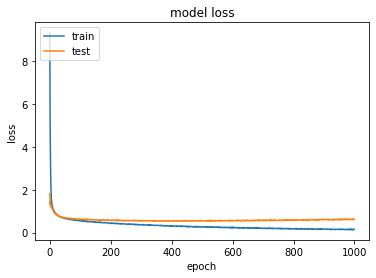

In [29]:
plt.plot(dnn_history.history['loss'])
plt.plot(dnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

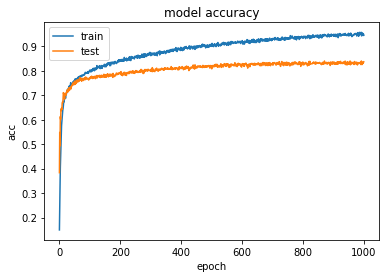

In [30]:
plt.plot(dnn_history.history['accuracy'])
plt.plot(dnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
predictions = dnn.predict_classes(x_test_exp)

print("predictions:\n", predictions)

/home/AN84020/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predictions:
 [3 0 4 ... 5 5 2]


In [32]:
y_test

array([3, 3, 4, ..., 5, 5, 2])

# Confusion Matrix

In [33]:
Ytest_to_int = y_test.astype(int)

In [34]:
Ytest_to_int

array([3, 3, 4, ..., 5, 5, 2])

In [35]:
report = classification_report(Ytest_to_int, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       157
           1       0.63      0.69      0.66        65
           2       0.87      0.82      0.84       201
           3       0.87      0.79      0.82       221
           4       0.83      0.91      0.87       183
           5       0.83      0.88      0.86       194
           6       0.85      0.84      0.84       188
           7       0.85      0.84      0.84       191

    accuracy                           0.84      1400
   macro avg       0.82      0.83      0.82      1400
weighted avg       0.84      0.84      0.84      1400



In [36]:
loaded_model = load_model(model_path)
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 128)           768       
_________________________________________________________________
dropout (Dropout)            (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 128)            82048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                6

In [37]:
loss, accuracy = loaded_model.evaluate(x_test_exp, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*accuracy))

44/44 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.8364
Restored model, accuracy: 83.64%
